In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import *
from metadata import *
from data_manager import *

Setting environment for Precision WorkStation


No vtk


In [2]:
correction_size_normalized = {stack: {} for stack in all_nissl_stacks}
correction_size = {stack: {} for stack in all_nissl_stacks}

for stack in all_nissl_stacks:
    
    print stack
    
    structures = load_hdf_v2(DataManager.get_annotation_filepath(stack=stack, 
                                                by_human=True,
                               timestamp='latest', suffix='structures'))
    
    for _, entry in structures.iterrows():
        tf = np.eye(4)
        edits = entry['edits']
        for edit in edits:
#             print edit['type']
            if 'type' in edit:
                if edit['type'] == 'shift3d' or edit['type'] == 'rotation3d':
                    T = consolidate(edit['transform'], edit['centroid_m'], edit['centroid_f'])
                    print edit['type'], T[:3,3]
                    tf = np.dot(T, tf)
                    
        d_um = np.linalg.norm(tf[:3,3])*convert_resolution_string_to_voxel_size(resolution='down8', stack=stack)
        
        structure_vol = bp.unpack_ndarray_str(entry['volume_in_bbox'])
        structure_length_um = get_structure_length_at_direction(structure_vol, tf[:3,3]) * convert_resolution_string_to_voxel_size(resolution='down8', stack=stack)
        
        print entry['name'], entry['side'], d_um, structure_length_um
        
        name_s = compose_label(entry['name'], entry['side'])
        correction_size[stack][name_s] = d_um
        correction_size_normalized[stack][name_s] = d_um / structure_length_um
        
    print '\n'

MD585


aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD585" "/home/yuncong/CSHL_labelings_v3/MD585" --exclude "*" --include "*structures*"
return code: 0


latest timestamp:  11012017011336
shift3d [  0.         -80.3355126  320.08680801]
shift3d [ 45.29604906 -26.35406491   0.        ]
shift3d [ 24.37776192 -14.33985995   0.        ]
SNC R 1285.1481512526045 968.4274236560861


MD589


aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD589" "/home/yuncong/CSHL_labelings_v3/MD589" --exclude "*" --include "*structures*"
return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD590" "/home/yuncong/CSHL_labelings_v3/MD590" --exclude "*" --include "*structures*"


latest timestamp:  10312017220310
shift3d [-3.33543634  0.         47.36319603]
shift3d [   2.9648323    0.        -136.3822859]
shift3d [13.34174536  0.         60.03785412]
shift3d [ 0.         -3.29425811 20.58911321]
3N L 58.1312309204829 453.0709153627252
shift3d [-1.48241615  0.         53.36698144]
shift3d [ 0.         -0.82356453 24.70693585]
3N R 287.3797831744257 243.01677308577902
shift3d [0. 0. 0.]
shift3d [23.75616484 11.29005854  0.        ]
4N R 96.79314988268878 129.39559138154735


MD590


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD591" "/home/yuncong/CSHL_labelings_v3/MD591" --exclude "*" --include "*structures*"


latest timestamp:  10312017221118
shift3d [   0.            3.89969277 -104.93718734]
shift3d [ 0.          1.77258762 61.33153179]
shift3d [ 0.         -5.12080869 18.90760132]
3N L 90.91149368675738 272.25214088727927
shift3d [0. 0. 0.]
shift3d [12.70131586  7.19741232  0.        ]
4N R 53.72373614320766 127.7470975925235
shift3d [  0.           0.70903505 -46.44179575]
shift3d [ 0.         -0.35451752 59.55894416]
shift3d [ 0.         -0.39390836 15.36242607]
3N R 104.80493437515482 272.4113576908615
shift3d [134.51553964  54.90430189   0.        ]
shift3d [-43.22725497   0.          25.93635298]
4N L 403.47181149302105 130.59955162740965


MD591


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD592" "/home/yuncong/CSHL_labelings_v3/MD592" --exclude "*" --include "*structures*"


latest timestamp:  11012017004215
shift3d [ 1.62102206  0.         52.95338733]
shift3d [ -16.2679413     0.         -124.04305242]
shift3d [ -2.03349266   0.         -17.28468763]
3N L 330.95994348044064 258.19691957864694
shift3d [  0.66708727   0.         -15.34300716]
3N R 56.515608146949155 231.621179753037
shift3d [  0.        -78.4406916 164.5341336]
shift3d [-71.69929977  44.25882702   0.        ]
shift3d [ 24.01514165   0.         -33.02081977]
shift3d [ 4.60872782  0.         12.05359584]
shift3d [  5.97494165 -27.88306102   0.        ]
shift3d [-9.95823608 -1.59331777  0.        ]
PBG L 603.3219776497964 186.93666802230138


MD592


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD593" "/home/yuncong/CSHL_labelings_v3/MD593" --exclude "*" --include "*structures*"


latest timestamp:  11012017004455
3N L 0.0 nan
3N R 0.0 nan
shift3d [-1.54968196  0.          9.29809174]
shift3d [-118.62040532    0.          166.06856745]
shift3d [  0.           2.47069359 -13.17703245]
shift3d [ 11.31058913 -26.55529621   0.        ]
PBG L 724.2772294034694 154.3016859495026
shift3d [168.05555556  -2.00617284   0.        ]
shift3d [-27.30782909 -19.47535098   0.        ]
shift3d [ 0.          9.33922175 33.3543634 ]
4N R 534.1691011690391 123.69581444530553


MD593


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD594" "/home/yuncong/CSHL_labelings_v3/MD594" --exclude "*" --include "*structures*"


latest timestamp:  11012017012940
shift3d [-95.92448105  93.49601318   0.        ]
shift3d [ 12.60053728   0.         -40.76644415]
shift3d [8.49963756 3.64270181 0.        ]
PBG R 475.511107356238 578.243016626559
shift3d [ -4.18414128   0.         -73.9198293 ]
shift3d [ 4.11782264  0.         27.17762944]
3N R 172.01146863504547 268.76503942163924
shift3d [   0.         -129.70837972  338.91544378]
shift3d [16.47129057 -3.29425811  0.        ]
SNC R 1341.1804459495456 953.8017005199068
shift3d [ 2.47069359  0.         32.94258114]
3N L 121.56917616688861 258.16293493840266


MD594


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD595" "/home/yuncong/CSHL_labelings_v3/MD595" --exclude "*" --include "*structures*"


latest timestamp:  11012017013215
shift3d [  0.           9.05920981 -13.17703245]
shift3d [0. 0. 0.]
shift3d [  0.          -2.22362423 -13.34174536]
shift3d [  0.           5.18845653 -15.56536959]
3N L 161.0668801463794 254.25989829158135
shift3d [   0.         -130.54520797  135.56617751]
shift3d [ 0.          7.32057359 48.4988    ]
SNC R 815.1364183478988 1058.6708251705766
shift3d [ 0.         -3.29425811 36.23683925]
shift3d [  0.           8.89449691 -23.71865842]
3N R 50.466678732326564 299.23143158433294
shift3d [  -1.25524238    0.         -168.2024795 ]
shift3d [-36.06274794  92.34249094   0.        ]
shift3d [  5.49043019   0.         -40.26315472]
shift3d [ -5.16234958 -13.22852081   0.        ]
shift3d [ 0.         -1.08068137 -4.3227255 ]
6N R 845.0896545684614 156.06409640075594


MD595


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD598" "/home/yuncong/CSHL_labelings_v3/MD598" --exclude "*" --include "*structures*"


latest timestamp:  11012017005748
shift3d [ 54.20467063 -20.64939833   0.        ]
shift3d [ 7.41208076  0.         17.2948551 ]
shift3d [ 9.95823608 -5.5766122   0.        ]
PBG R 287.65019536045213 345.57054352806693
shift3d [-225.20750058 -173.58400474    0.        ]
shift3d [ 16.30657766   0.         -51.14335721]
PBG L 1017.0833324252445 229.8098677197775


MD598


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD599" "/home/yuncong/CSHL_labelings_v3/MD599" --exclude "*" --include "*structures*"


latest timestamp:  11012017013514
shift3d [   0.        -264.0198888  235.3220748]
shift3d [  0.          30.99363912 -32.71550796]
SNC R 1136.3435643666548 1011.7930477187749
shift3d [-107.47517095    0.          121.55812439]
shift3d [-9.83529489  3.93411796  0.        ]
PBG L 621.8394298485409 258.5037518281527
shift3d [ 16.30657766   0.         -66.7087268 ]
3N L 252.71604456793955 247.6109019547039
shift3d [131.45600567 -39.72428004   0.        ]
shift3d [  0.          -3.78238481 -10.26647305]
4N L 510.96255727235615 131.67150310217113
shift3d [-118.05052169   43.84733663    0.        ]
shift3d [ 54.84939759   0.         -34.09557147]
shift3d [-9.95823608 17.92482494  0.        ]
PBG R 374.0335765363904 468.5580200334295
shift3d [   2.47069359    0.         -113.65190492]
shift3d [  7.41208076   0.         128.97020514]
shift3d [  1.48241615   0.         -12.60053728]
3N R 43.00309349510308 445.7523576230517


MD599


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD602" "/home/yuncong/CSHL_labelings_v3/MD602" --exclude "*" --include "*structures*"


latest timestamp:  10312017205108
3N R 0.0 nan
shift3d [-156.14514172   27.08640214    0.        ]
6N R 583.1955798413921 158.57546034909285
shift3d [  0.           9.05920981 -51.06100076]
shift3d [  0.         -14.82416151  -4.11782264]
3N L 204.16330965372555 270.73653766428214
shift3d [177.88993813   0.         -71.15597525]
shift3d [10.74414007  4.35573246  0.        ]
PBG R 742.0924224670013 289.8683723166234


MD602


return code: 0
aws s3 cp --recursive "s3://mousebrainatlas-data/CSHL_labelings_v3/MD603" "/home/yuncong/CSHL_labelings_v3/MD603" --exclude "*" --include "*structures*"


latest timestamp:  10312017205515
shift3d [ 0.         12.25492678 34.13872461]
3N R 133.47983203046024 276.46603992561
shift3d [ 28.24295365   0.         -22.59436292]
3N L 133.1005518060593 414.37271894380063


MD603


return code: 0


latest timestamp:  10312017211410
shift3d [ -9.00567812   0.         -73.84656057]
shift3d [ 8.23564528  0.         39.53109736]
3N L 126.31269468245463 256.5444747431601
shift3d [  13.27764811 -100.81177265    0.        ]
shift3d [  0.          33.89154438 -21.46464477]
shift3d [0. 0. 0.]
shift3d [-9.29435367 14.16282465  0.        ]
PBG R 210.11289429633578 391.7186025664037
shift3d [   0.      440.8992 -157.464 ]
VLL R 1722.880797831632 1645.9173178795852
shift3d [-3.29425811  0.         46.94317812]
shift3d [-0.58076433 13.35757955  0.        ]
3N R 180.17359304951555 361.1002111535693




In [19]:
print 'median correction distance:', np.median([y for x in correction_size.values() for y in x.values()]), 'um'

median correction distance: 252.71604456793955 um


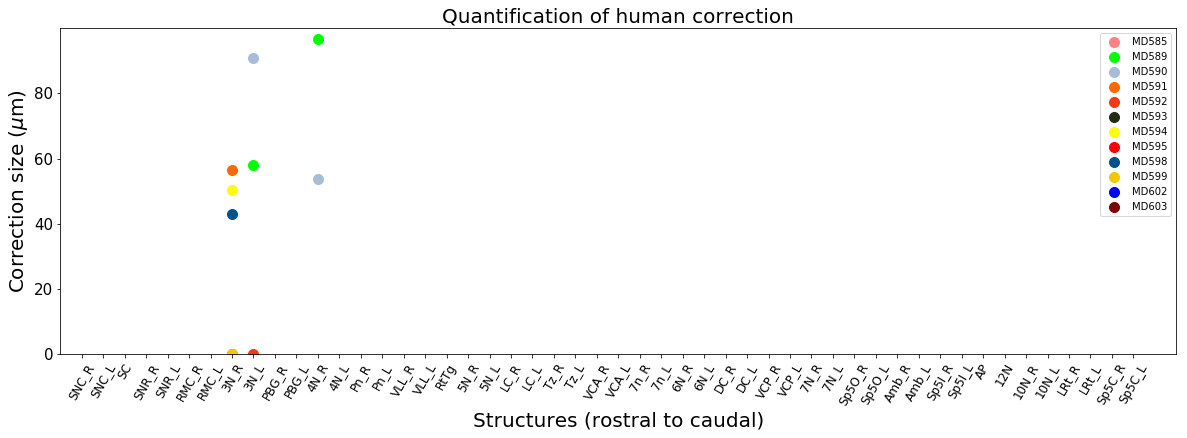

In [8]:
plot_by_stack_by_structure(correction_size, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           ylabel='Correction size ($\mu$m)',
                                                      xlabel='Structures (rostral to caudal)',
                           title='Quantification of human correction',
                          yticks=np.arange(0, 100, 20),
                           yticklabel_fmt='%d',
                          stack_to_color=stack_to_color);

In [25]:
DataFrame(correction_size).to_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/human_corrections_um.csv')

### Normalize correction distance by size

In [21]:
print 'median correction distance (normalized by structure size):', np.nanmedian([y for x in correction_size_normalized.values() for y in x.values()])

median correction distance (normalized by structure size): 0.8103015308379348


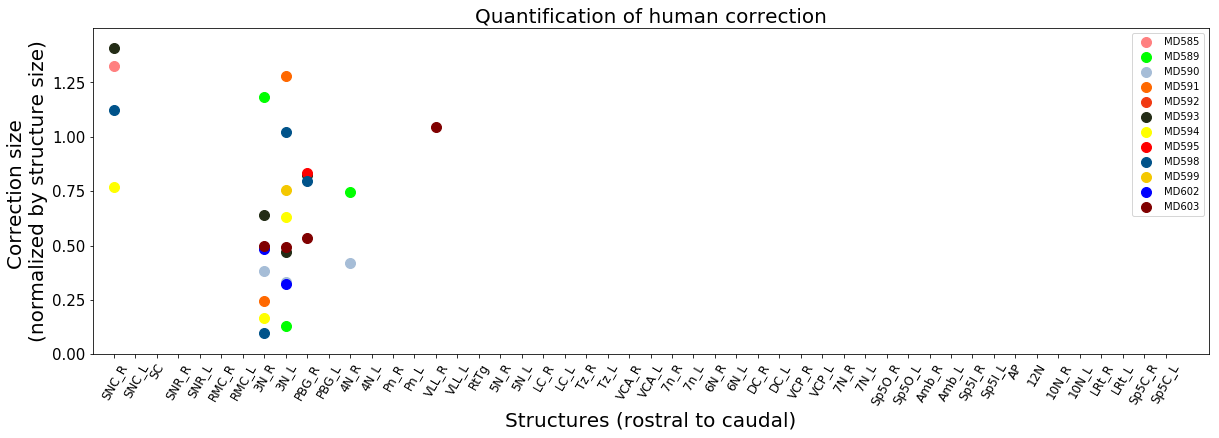

In [14]:
plot_by_stack_by_structure(correction_size_normalized, 
                           structures=structures_sided_sorted_by_rostral_caudal_position,
                           ylabel='Correction size \n(normalized by structure size)',
                           xlabel='Structures (rostral to caudal)',
                           title='Quantification of human correction',
                          yticks=np.arange(0, 1.5, .25),
                          stack_to_color=stack_to_color);

In [26]:
DataFrame(correction_size_normalized).to_csv('/home/yuncong/Dropbox/BrainProjectFiguresByTopic/Registration/compare_vs_expert_annotation/measurements/human_corrections_normalized_by_structure_size.csv')

# Human confidence vs machine confidence

In [ ]:
eval_form = read_csv('/home/yuncong/Brain/automatic_annotation_evaluation.csv')

In [ ]:
low_zscore = defaultdict(dict)
low_x_width = defaultdict(dict)
low_y_width = defaultdict(dict)
low_z_width = defaultdict(dict)
machine_confidence = defaultdict(dict)
human_correction = defaultdict(dict)

structure_names = list(eval_form['Unnamed: 0'][0:51])
for _, x in eval_form.iterrows():
    s = x['Unnamed: 0']
    for st in all_nissl_stacks:
        val = x[st]
        if isinstance(val, str):
            if '*' in val:
                low_zscore[s][st] = True
                machine_confidence[s][st] = 0.
            if 'x' in val:
                low_x_width[s][st] = True
                machine_confidence[s][st] = 0.
            if 'y' in val:
                low_y_width[s][st] = True
                machine_confidence[s][st] = 0.
            if 'z' in val:
                low_z_width[s][st] = True
                machine_confidence[s][st] = 0.
            if 'w' in val:
                human_correction[s][st] = 1
            if 'c' in val:
                human_correction[s][st] = 0
            if 'i' in val:
                human_correction[s][st] = .5
        else:
            machine_confidence[s][st] = 1.
            human_correction[s][st] = 0

In [ ]:
machine_confidence_df = pd.DataFrame(machine_confidence, columns=structure_names)

human_correction_df = pd.DataFrame(human_correction, columns=structure_names)

machine_confidence_unsided = {}
for s in all_known_structures:
    if s not in singular_structures:
        lname = convert_to_left_name(s)
        rname = convert_to_right_name(s)
        machine_confidence_unsided[s] = machine_confidence_df[[lname, rname]].stack().mean()
    else:
        machine_confidence_unsided[s] = machine_confidence_df[s].mean()
        
human_correction_unsided = {}
for s in all_known_structures:
    if s not in singular_structures:
        lname = convert_to_left_name(s)
        rname = convert_to_right_name(s)
        human_correction_unsided[s] = human_correction_df[[lname, rname]].stack().mean()
    else:
        human_correction_unsided[s] = human_correction_df[s].mean()
        
plt.figure(figsize=(10,10));
for s in all_known_structures:
    plt.text(human_correction_unsided[s] + .05 * (2*np.random.random(1)-1), 
             machine_confidence_unsided[s] + .05 * (2*np.random.random(1)-1), 
             s=s, fontsize=20)
plt.xlim(-0.1, 1.1);
plt.ylim(-0.1, 1.1);
plt.ylabel('Machine confidence', fontsize=20);
plt.xlabel('Amount of human correction', fontsize=20);